# Spotify Data Analysis
Using my own personal spotify data, I will analyze my personal music style and listening habits

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
st1 = pd.read_csv('StreamingHistory1.csv')
st1.head()

,endTime,artistName,trackName,msPlayed
0,2022-01-06 10:44,kokoro,Solstice,171877
1,2022-01-06 10:47,xander.,Cold Coffee,192889
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608
3,2022-01-06 10:52,tomcbumpz,introspection,136532
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108


In [4]:
st2 = pd.read_csv('StreamingHistory2.csv')
st2.head()

,endTime,artistName,trackName,msPlayed
0,2022-05-08 15:36,BAEKHYUN,Bambi,213053
1,2022-05-08 15:39,KAI,Mmmh,192346
2,2022-05-08 15:42,ENHYPEN,Blessed-Cursed,170805
3,2022-05-08 15:45,Jus2,FOCUS ON ME,216458
4,2022-05-08 15:49,NCT 127,Favorite (Vampire),215586


In [5]:
streams = pd.concat([st1,st2]).reset_index().iloc[:,1:]
streams

,endTime,artistName,trackName,msPlayed
0,2022-01-06 10:44,kokoro,Solstice,171877
1,2022-01-06 10:47,xander.,Cold Coffee,192889
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608
3,2022-01-06 10:52,tomcbumpz,introspection,136532
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108
...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398
16910,2022-09-09 19:31,NCT 127,Kick It,233013
16911,2022-09-09 19:34,NCT 127,Lemonade,190066


Some things I'd like to invesitgate:
- Music listens during a certain time frame (timeline starts at the beginning of Winter Quarter and ends just at the beginning of September)
    - I would like to see if my music listening patterns change because of different quarters of school, whether or not im in school and what kind of activities I'm doing at the moment
- I would also like to see if I can highlight which artists I listen to the most and count specifically how long/much I do listen to them
- I might be interested in doing some sort of machine learning with this data but I am not sure what I can possibly do.

First I would like to add more columns to the dataframe. 
- change the msPlayed to minutes instead of seconds (maybe round up for whole minutes or just keep it at a decimal)
- add more columns to represent time (separate the date, separate the month, separate the season, separate the time of day, etc.)

### Change msPlayed to minutes (rounding up)

In [6]:
minutesPlayed = (streams.msPlayed)/60000
streams['minutesPlayed'] = minutesPlayed
streams

,endTime,artistName,trackName,msPlayed,minutesPlayed
0,2022-01-06 10:44,kokoro,Solstice,171877,2.864617
1,2022-01-06 10:47,xander.,Cold Coffee,192889,3.214817
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608,2.610133
3,2022-01-06 10:52,tomcbumpz,introspection,136532,2.275533
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108,2.801800
...,...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640,4.027333
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398,2.523300
16910,2022-09-09 19:31,NCT 127,Kick It,233013,3.883550
16911,2022-09-09 19:34,NCT 127,Lemonade,190066,3.167767


### General Spotlight metrics

In [7]:
print(streams['trackName'].nunique(), 'unique songs')

3169 unique songs


In [8]:
print(streams['artistName'].nunique(), 'unique artists')

1432 unique artists


In [9]:
print(streams['minutesPlayed'].sum(), 'Total Minutes Streamed')

45184.512683333334 Total Minutes Streamed


In [10]:
group_streams = streams.groupby(['artistName']).sum().sort_values('minutesPlayed', ascending = False)
group_streams.head(20)

,msPlayed,minutesPlayed
artistName,,
SEVENTEEN,429712714,7161.878567
ATEEZ,275483976,4591.399600
NCT 127,102150923,1702.515383
ENHYPEN,100628666,1677.144433
Harry Styles,67545201,1125.753350
BTS,54255479,904.257983
TOMORROW X TOGETHER,51592220,859.870333
NCT DREAM,50015288,833.588133
NCT U,48856112,814.268533


Wow look at Seventeen taking the lead 8) no wonder they are my ult group! Everyone should seriously take a listen!!!
- I've been listening to them consistently for a couple year now so not that surprising theyre at the top. plus I just went to their concert back in the middle of august so I was all pumped up listening to only them
- Ateez being second doesn't surprise me cause i saw them live back in January and have been streaming them religiously ever since, but I didnt expect them to be such a distant second...
- Actually pretty surprised how high Harry Styles is because I only really listen to 2 songs of his since his third album came out... but I did listen to them a lot

In [11]:
track_streams = streams.groupby(['trackName']).sum().sort_values('minutesPlayed', ascending = False)
track_streams.head(20)

,msPlayed,minutesPlayed
trackName,,
Answer,34999529,583.325483
Deja Vu,34685709,578.095150
The Real - Heung Version,28889412,481.490200
Favorite (Vampire),26473393,441.223217
Fireworks (I'm The One),25584632,426.410533
Tamed-Dashed,22165017,369.416950
The Stealer,21828052,363.800867
OK!,21776275,362.937917
Crush,21145401,352.423350


The way answer is my most played song so far... THAT SONG IS 2 YEARS OLD?!?!
- no hate to Ateez and answer cause it is quite literally their best song... but I should really start diversifying my song plays
- interesting how Seventeen is my most played artist by a landslide but are kind low for my individual songs
- shows that i listen to more of Seventeen's discography that my listens are more evenly distrubuted (no songe gets significantly more listens than another, at leas during these last 9 months)
- I have a feeling if I change up the timeline, things will change with the amount of relative listens for groups.
- Hot is easily the newest song on this list since it came out in June. I anticipate this song to be the highest in the weeks leading up to my spotify wrapped coming out

### Time to start thinking about time

In [12]:
# streams.endTime[0][:10] # shows the date
# streams.endTime[0][11:] # shows the time of day

In [13]:
streams['Date'] = streams.endTime.apply(lambda x: x[:10])
streams

,endTime,artistName,trackName,msPlayed,minutesPlayed,Date
0,2022-01-06 10:44,kokoro,Solstice,171877,2.864617,2022-01-06
1,2022-01-06 10:47,xander.,Cold Coffee,192889,3.214817,2022-01-06
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608,2.610133,2022-01-06
3,2022-01-06 10:52,tomcbumpz,introspection,136532,2.275533,2022-01-06
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108,2.801800,2022-01-06
...,...,...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640,4.027333,2022-09-09
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398,2.523300,2022-09-09
16910,2022-09-09 19:31,NCT 127,Kick It,233013,3.883550,2022-09-09
16911,2022-09-09 19:34,NCT 127,Lemonade,190066,3.167767,2022-09-09


In [14]:
streams['Month'] = streams.endTime.apply(lambda x: x[5:7])
streams

,endTime,artistName,trackName,msPlayed,minutesPlayed,Date,Month
0,2022-01-06 10:44,kokoro,Solstice,171877,2.864617,2022-01-06,01
1,2022-01-06 10:47,xander.,Cold Coffee,192889,3.214817,2022-01-06,01
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608,2.610133,2022-01-06,01
3,2022-01-06 10:52,tomcbumpz,introspection,136532,2.275533,2022-01-06,01
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108,2.801800,2022-01-06,01
...,...,...,...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640,4.027333,2022-09-09,09
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398,2.523300,2022-09-09,09
16910,2022-09-09 19:31,NCT 127,Kick It,233013,3.883550,2022-09-09,09
16911,2022-09-09 19:34,NCT 127,Lemonade,190066,3.167767,2022-09-09,09


In [15]:
streams['Time'] = streams.endTime.apply(lambda x: x[11:])
streams

,endTime,artistName,trackName,msPlayed,minutesPlayed,Date,Month,Time
0,2022-01-06 10:44,kokoro,Solstice,171877,2.864617,2022-01-06,01,10:44
1,2022-01-06 10:47,xander.,Cold Coffee,192889,3.214817,2022-01-06,01,10:47
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608,2.610133,2022-01-06,01,10:50
3,2022-01-06 10:52,tomcbumpz,introspection,136532,2.275533,2022-01-06,01,10:52
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108,2.801800,2022-01-06,01,10:55
...,...,...,...,...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640,4.027333,2022-09-09,09,18:59
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398,2.523300,2022-09-09,09,19:27
16910,2022-09-09 19:31,NCT 127,Kick It,233013,3.883550,2022-09-09,09,19:31
16911,2022-09-09 19:34,NCT 127,Lemonade,190066,3.167767,2022-09-09,09,19:34


In [16]:
# create a list of our conditions
conditions = [
    (streams['Month'] == '01') | (streams['Month'] == '02') | (streams['Month'] == '03'),
    (streams['Month'] == '04') | (streams['Month'] == '05') | (streams['Month'] == '06'),
    (streams['Month'] == '07') | (streams['Month'] == '08') | (streams['Month'] == '09')
    ]
# create a list of the values we want to assign for each condition
values = ['Winter', 'Spring', 'Summer']

# create a new column and use np.select to assign values to it using our lists as arguments
streams['Quarter'] = np.select(conditions, values)
streams

,endTime,artistName,trackName,msPlayed,minutesPlayed,Date,Month,Time,Quarter
0,2022-01-06 10:44,kokoro,Solstice,171877,2.864617,2022-01-06,01,10:44,Winter
1,2022-01-06 10:47,xander.,Cold Coffee,192889,3.214817,2022-01-06,01,10:47,Winter
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608,2.610133,2022-01-06,01,10:50,Winter
3,2022-01-06 10:52,tomcbumpz,introspection,136532,2.275533,2022-01-06,01,10:52,Winter
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108,2.801800,2022-01-06,01,10:55,Winter
...,...,...,...,...,...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640,4.027333,2022-09-09,09,18:59,Summer
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398,2.523300,2022-09-09,09,19:27,Summer
16910,2022-09-09 19:31,NCT 127,Kick It,233013,3.883550,2022-09-09,09,19:31,Summer
16911,2022-09-09 19:34,NCT 127,Lemonade,190066,3.167767,2022-09-09,09,19:34,Summer


In [17]:
streams['Date'] = pd.to_datetime(streams['Date'])
streams['day-of-week'] = streams['Date'].dt.day_name()
streams

,endTime,artistName,trackName,msPlayed,minutesPlayed,Date,Month,Time,Quarter,day-of-week
0,2022-01-06 10:44,kokoro,Solstice,171877,2.864617,2022-01-06,01,10:44,Winter,Thursday
1,2022-01-06 10:47,xander.,Cold Coffee,192889,3.214817,2022-01-06,01,10:47,Winter,Thursday
2,2022-01-06 10:50,Rudy Raw,Warm Atmos,156608,2.610133,2022-01-06,01,10:50,Winter,Thursday
3,2022-01-06 10:52,tomcbumpz,introspection,136532,2.275533,2022-01-06,01,10:52,Winter,Thursday
4,2022-01-06 10:55,Blue Wednesday,Birds Eye View,168108,2.801800,2022-01-06,01,10:55,Winter,Thursday
...,...,...,...,...,...,...,...,...,...,...
16908,2022-09-09 18:59,BLACKPINK,BOOMBAYAH - Japanese Version,241640,4.027333,2022-09-09,09,18:59,Summer,Friday
16909,2022-09-09 19:27,SEVENTEEN,HOT,151398,2.523300,2022-09-09,09,19:27,Summer,Friday
16910,2022-09-09 19:31,NCT 127,Kick It,233013,3.883550,2022-09-09,09,19:31,Summer,Friday
16911,2022-09-09 19:34,NCT 127,Lemonade,190066,3.167767,2022-09-09,09,19:34,Summer,Friday


Now that I have the time subsetted on the right side of the dataframe, I can investigate more into my listening patterns during specific time frames

In [20]:
quarter_month_listens = streams.groupby(['Quarter','Month']).sum().sort_values('minutesPlayed', ascending=False).reset_index()
quarter_month_listens

,Quarter,Month,msPlayed,minutesPlayed
0,Winter,02,460072403,7667.873383
1,Summer,08,410999859,6849.997650
2,Winter,01,409922963,6832.049383
3,Winter,03,362133745,6035.562417
4,Spring,06,324093950,5401.565833
5,Spring,05,309016017,5150.266950
6,Spring,04,242538163,4042.302717
7,Summer,09,109457388,1824.289800
8,Summer,07,82836273,1380.604550


In [46]:
data_types = {'Quarter':str,
            'Month':str,
            'msPlayed':int,
            'minutesPlayed':float}
quarter_month_listens = quarter_month_listens.astype(data_types)
quarter_month_listens

,Quarter,Month,msPlayed,minutesPlayed
0,Winter,02,460072403,7667.873383
1,Summer,08,410999859,6849.997650
2,Winter,01,409922963,6832.049383
3,Winter,03,362133745,6035.562417
4,Spring,06,324093950,5401.565833
5,Spring,05,309016017,5150.266950
6,Spring,04,242538163,4042.302717
7,Summer,09,109457388,1824.289800
8,Summer,07,82836273,1380.604550


In [78]:
pd.DataFrame(list(quarter_month_listens.minutesPlayed),list(quarter_month_listens.Month))

,0
02,7667.873383
08,6849.997650
01,6832.049383
03,6035.562417
06,5401.565833
05,5150.266950
04,4042.302717
09,1824.289800
07,1380.604550


In [75]:
for_plotting1 = pd.DataFrame(list(quarter_month_listens.minutesPlayed),list(quarter_month_listens.Month)).reset_index()
for_plotting1.columns = ['Month','minutesPlayed']
for_plotting1.sort_values('Month')
for_plotting1

,Month,minutesPlayed
0,02,7667.873383
1,08,6849.997650
2,01,6832.049383
3,03,6035.562417
4,06,5401.565833
5,05,5150.266950
6,04,4042.302717
7,09,1824.289800
8,07,1380.604550


<AxesSubplot:>

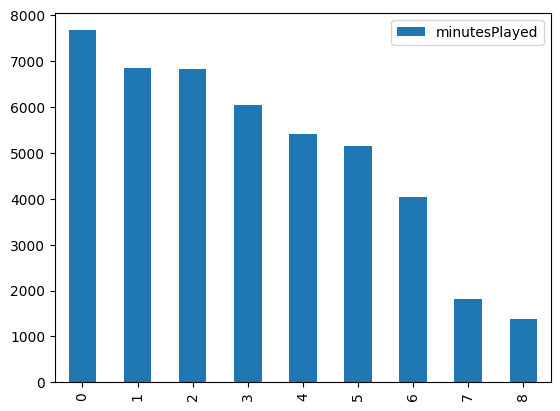

In [59]:
for_plotting1.plot(kind="bar")

In [55]:
day_of_week_listens = streams.groupby(['day-of-week']).sum().sort_values('minutesPlayed', ascending=False)
day_of_week_listens

,msPlayed,minutesPlayed
day-of-week,,
Friday,510052937,8500.882283
Sunday,447549026,7459.150433
Saturday,390486067,6508.101117
Tuesday,378084710,6301.411833
Wednesday,364357018,6072.616967
Thursday,317851304,5297.521733
Monday,302689699,5044.828317
